<a href="https://colab.research.google.com/github/omatheuscarvalho/airline-time-series-forecasting/blob/main/temp_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Apresentar o notebook de fazer a previsão da sua série com o modelo ARIMA e o modelo MLP comparando com WMAPE

Duvidas:
*   Grafico datado como anos, mas o time seria em meses mesmo?



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import MinMaxScaler

In [ ]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
data = pd.read_csv(url, index_col='Month', parse_dates=True)

Sobre o dataset =>  Possui informações sobre o número de passageiros de uma empresa de viagens aéreas por dia desde 1946 até 1960

In [ ]:
print(data.head())

            Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121


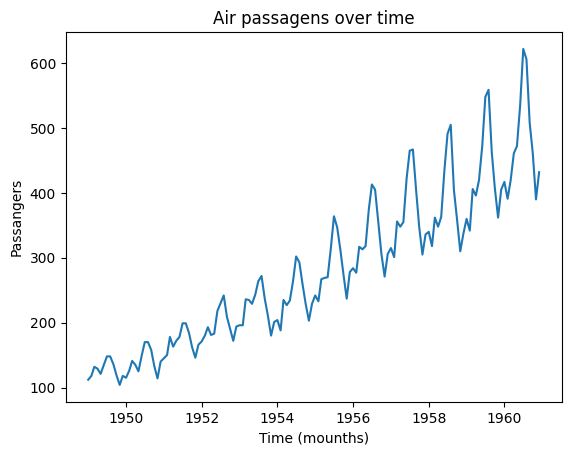

In [ ]:
plt.plot(data)
plt.title('Air passagens over time')
plt.xlabel('Time (mounths)')
plt.ylabel('Passangers')
plt.show()

Tentando entender o gráfico 🥰
*   Tendência: crescimento ao longo dos anos
*   Sazionalidade: existe, aparentermente em períodos parecidos, o que pode indicar que existem épocas específicas de aumento (ferás, feriados, etc)
* Volatilidade Crescente: a variação entre os meses tamém está sendo maior




In [ ]:
#Separar 80% dos dados para treino e 20% para teste
train_size_sazionalido = int(len(data) * 0.8)
train_data_sazionalizado = data[:train_size_sazionalido]
test_data_sazionalizado = data[train_size_sazionalido:]

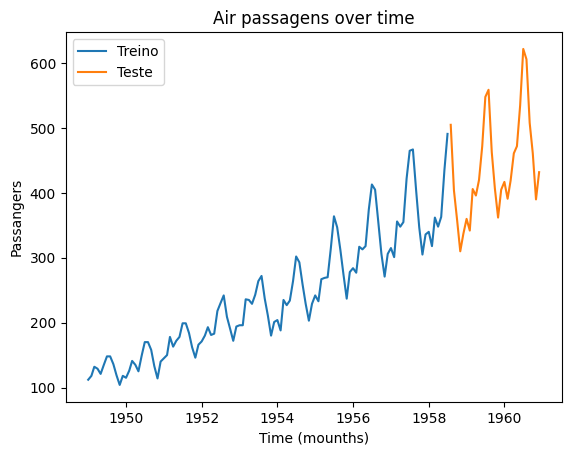

In [ ]:
#Plotando codigo
plt.plot(train_data_sazionalizado, label='Treino')
plt.plot(test_data_sazionalizado, label='Teste')
plt.title('Air passagens over time')
plt.xlabel('Time (mounths)')
plt.ylabel('Passangers')
plt.legend()

In [ ]:
#Ajustar modelo ARIMA
model = ARIMA(train_data_sazionalizado, order=(5,1,0))
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
#Ajustar modelo ARIMA
model_so = ARIMA(train_data_sazionalizado, seasonal_order=(12,1,0,12))
model_so_fit = model_so.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Entendendo o modelo ARIMA:
* Os parâmetros de ordem: p, d, q
* p = Auto regressivo, significa que o modelo irá olhar os 'p' valores passados para prever o futuro, no caso, utilizei 5.
* d = Ordem de diferenciação, uma tentativa de 'nivelar' o grafico para remover tendencias
* q = Erros passados

In [ ]:
# Fazer previsão
arima_pred = model_fit.forecast(steps=len(test_data_sazionalizado))

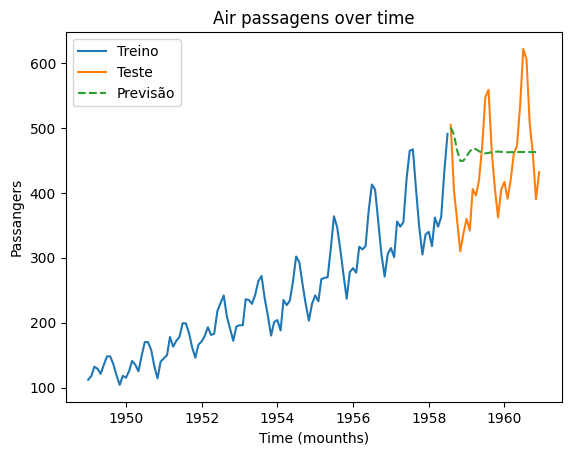

In [ ]:
# Plotando as previsões
plt.plot(train_data_sazionalizado, label='Treino')
plt.plot(test_data_sazionalizado, label='Teste')
plt.plot(arima_pred, label='Previsão', linestyle='--')
plt.title('Air passagens over time')
plt.xlabel('Time (mounths)')
plt.ylabel('Passangers')
plt.legend()

In [ ]:
# Refazer o grafico anterior de forma a deixar o grafico sem sazionalidade

Utilizando sazional decompose para retirar a sazionalidade do grafico
* Como o gráfico tem períodos sazionais de 12 meses, usei esse parâmetro

In [ ]:
result_sazional = seasonal_decompose(train_data_sazionalizado, model='additive', period=12)

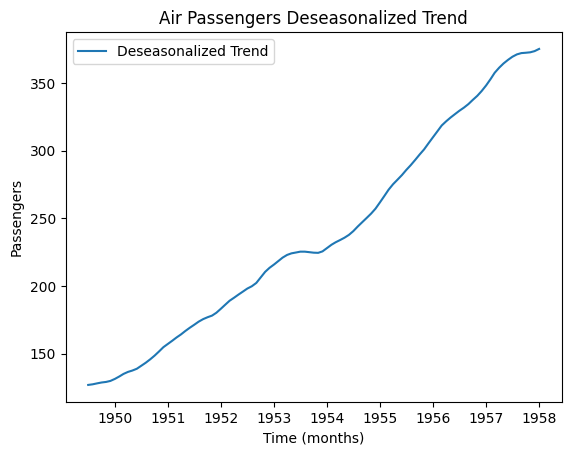

In [ ]:
plt.plot(result_sazional.trend, label='Deseasonalized Trend')
plt.title('Air Passengers Deseasonalized Trend')
plt.xlabel('Time (months)')
plt.ylabel('Passengers')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


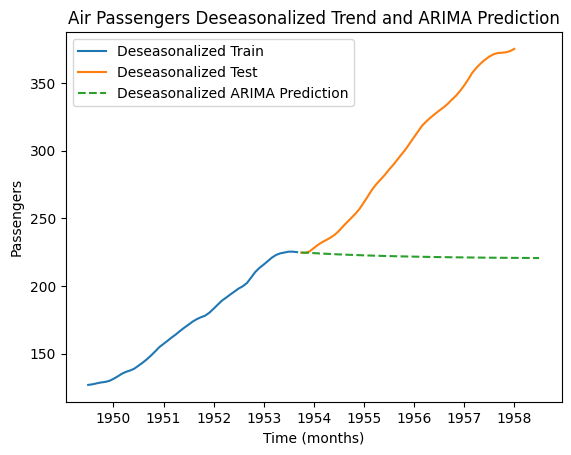

In [ ]:
train_size = int(len(result_sazional.trend) * 0.5)
train_deseasonalized = result_sazional.trend[:train_size]
test_deseasonalized = result_sazional.trend[train_size:]
model_deseasonalized = ARIMA(train_deseasonalized, order=(5,1,0))
model_deseasonalized_fit = model_deseasonalized.fit()
arima_pred_deseasonalized = model_deseasonalized_fit.forecast(steps=len(test_deseasonalized))
plt.plot(train_deseasonalized, label='Deseasonalized Train')
plt.plot(test_deseasonalized, label='Deseasonalized Test')
plt.plot(arima_pred_deseasonalized, label='Deseasonalized ARIMA Prediction', linestyle='--')
plt.title('Air Passengers Deseasonalized Trend and ARIMA Prediction')
plt.xlabel('Time (months)')
plt.ylabel('Passengers')
plt.legend()
plt.show()

Cálculo WMMAP

In [ ]:
#Fazer WMAP do teste anterior
def wmape(y_true, y_pred):
    return np.sum(np.abs(y_true - y_pred) / y_true) / len(y_true)

# 'Passengers' values is already a 1D array, no need for further extraction
wape_arima = wmape(test_data_sazionalizado['Passengers'].values, arima_pred)
print(f'WMAPE do modelo ARIMA Sazionalizado: {wape_arima * 100:.2f}%')

WMAPE do modelo ARIMA Sazionalizado: 16.15%


In [ ]:
#Fazer WMAP do teste anterior
def wmape(y_true, y_pred):
    return np.sum(np.abs(y_true - y_pred) / y_true) / len(y_true)

# Calcula o WMAPE para o modelo desazonalizado
wape_arima_deseasonalized = wmape(test_deseasonalized.values, arima_pred_deseasonalized)
print(f'WMAPE do modelo ARIMA desazonalizado: {wape_arima_deseasonalized * 100:.2f}%')

WMAPE do modelo ARIMA desazonalizado: 21.54%


Fiz alguns testes tentando entender qual seria o melhor parämetro na relação de teste e treino, cheguei ao seguinte grafico:


 % Teste  WMAPE %
      50    21.54
      60     9.31
      70     2.29
      75     2.54
      78     0.57
      79     1.05
      80     1.85
      81     1.12
      82     0.77
      83     1.01
      84     0.69
      85     0.93


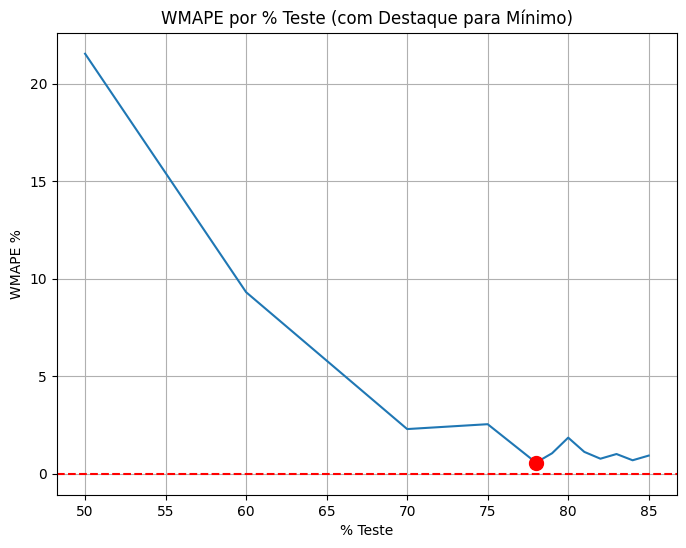

In [ ]:
dados_testes01 = {
    '% Teste': [50, 60, 70, 75, 78, 79, 80, 81, 82, 83, 84, 85],
    'WMAPE %': [21.54, 9.31, 2.29, 2.54, 0.57, 1.05, 1.85, 1.12, 0.77, 1.01, 0.69, 0.93]
}

dados_teste_01df = pd.DataFrame(dados_testes01)
print(dados_teste_01df.to_string(index=False))

plt.figure(figsize=(8, 6))
plt.plot(dados_teste_01df['% Teste'], dados_teste_01df['WMAPE %'])
plt.axhline(y=0, color='red', linestyle='--')  # Linha horizontal em y=0
min_index = dados_teste_01df['WMAPE %'].idxmin()
plt.plot(dados_teste_01df.loc[min_index, '% Teste'], dados_teste_01df.loc[min_index, 'WMAPE %'], 'ro', markersize=10)  # Marca o ponto mínimo
plt.xlabel('% Teste')
plt.ylabel('WMAPE %')
plt.title('WMAPE por % Teste (com Destaque para Mínimo)')
plt.grid(True)
plt.show()

Então, fui atras de alguma solução mais eficaz para o meu problema...

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_date

Melhor modelo ARIMA: Ordem (1, 1, 5) com WMAPE: 0.01


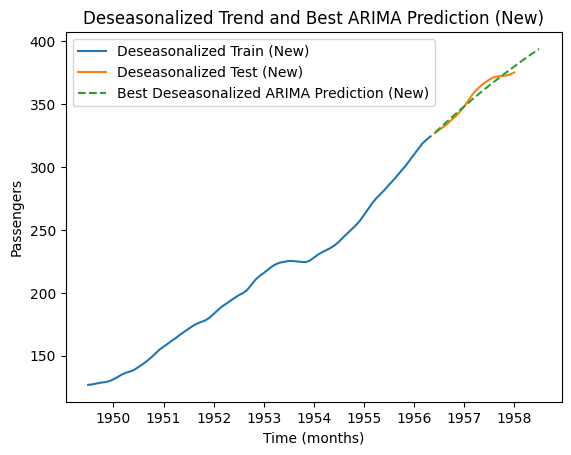

In [ ]:
import itertools
# Definindo um novo conjunto de dados e variáveis
train_size_new = int(len(result_sazional.trend) * 0.78)
train_deseasonalized_new = result_sazional.trend[:train_size_new]
test_deseasonalized_new = result_sazional.trend[train_size_new:]

# Definir os ranges para p, d, q
p_values_new = range(0, 6)
d_values_new = range(0, 2)
q_values_new = range(0, 6)

# Criar todas as combinações possíveis de p, d, q
pdq_combinations_new = list(itertools.product(p_values_new, d_values_new, q_values_new))

# Variáveis para armazenar os melhores resultados
best_wmape_new = np.inf
best_pdq_new = None
best_model_new = None

# Testar cada combinação de p, d, q
for pdq_new in pdq_combinations_new:
    try:
        # Ajustar o modelo ARIMA para cada combinação de p, d, q
        model_new = ARIMA(train_deseasonalized_new, order=pdq_new)
        model_fit_new = model_new.fit()

        # Fazer previsões
        predictions_new = model_fit_new.forecast(steps=len(test_deseasonalized_new))

        # Calcular WMAPE
        wmape_value_new = wmape(test_deseasonalized_new, predictions_new)

        # Atualizar os melhores valores encontrados
        if wmape_value_new < best_wmape_new:
            best_wmape_new = wmape_value_new
            best_pdq_new = pdq_new
            best_model_new = model_fit_new
    except:
        continue

# Exibir o melhor modelo encontrado
print(f'Melhor modelo ARIMA: Ordem {best_pdq_new} com WMAPE: {best_wmape_new:.2f}')

# Plotar os resultados com o melhor modelo
best_predictions_new = best_model_new.forecast(steps=len(test_deseasonalized_new))

plt.plot(train_deseasonalized_new, label='Deseasonalized Train (New)')
plt.plot(test_deseasonalized_new, label='Deseasonalized Test (New)')
plt.plot(best_predictions_new, label='Best Deseasonalized ARIMA Prediction (New)', linestyle='--')
plt.title('Deseasonalized Trend and Best ARIMA Prediction (New)')
plt.xlabel('Time (months)')
plt.ylabel('Passengers')
plt.legend()
plt.show()

No teste acima, eu esperimentei todas as combinações possiveis de p, q e d para os valores de 75, 80 e 85%, e encontrei os seguintes resultados:
* 0.85 	-> 2 0 5
* 0.80 	-> 2 1 2
* 0.78	-> 1 1 5

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_date

Melhor ARIMA: Ordem (2, 0, 5) com WMAPE: 0.48 e proporção de treino: 0.85


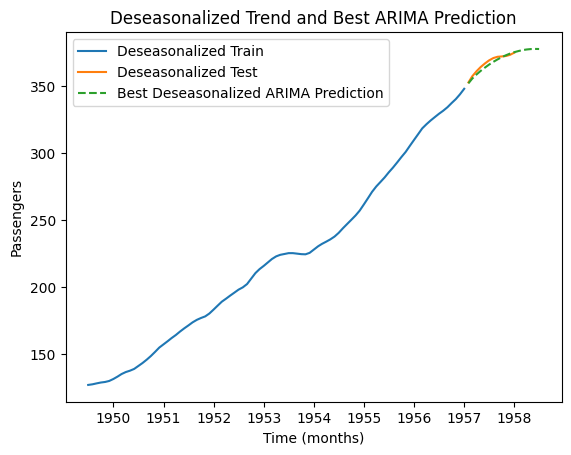

In [ ]:


# Função WMAPE
def wmape(y_true, y_pred):
    return np.sum(np.abs(y_true - y_pred)) / np.sum(np.abs(y_true)) * 100

# Definir o range de valores para p, d, q e proporção de treino
p_values = range(0, 6)
d_values = range(0, 2)
q_values = range(0, 6)

# Testar diferentes proporções de treino: 50%, 60%, 70%, 80%, 85%
train_proportions = [0.5, 0.6, 0.7, 0.8, 0.85]

# Criar todas as combinações possíveis de p, d, q
pdq_combinations = list(itertools.product(p_values, d_values, q_values))

# Variáveis para armazenar os melhores resultados
best_wmape = np.inf
best_pdq = None
best_train_size = None
best_model = None

# Loop para testar cada proporção de treino e cada combinação de p, d, q
for train_prop in train_proportions:
    # Definir o tamanho do conjunto de treino com base na proporção atual
    train_size = int(len(result_sazional.trend) * train_prop)

    # Dividir os dados em treino e teste com base na proporção atual
    train_deseasonalized = result_sazional.trend[:train_size]
    test_deseasonalized = result_sazional.trend[train_size:]

    # Testar cada combinação de p, d, q
    for pdq in pdq_combinations:
        try:
            # Ajustar o modelo ARIMA para cada combinação de p, d, q
            model = ARIMA(train_deseasonalized, order=pdq)
            model_fit = model.fit()

            # Fazer previsões
            predictions = model_fit.forecast(steps=len(test_deseasonalized))

            # Calcular WMAPE
            wmape_value = wmape(test_deseasonalized, predictions)

            # Atualizar os melhores valores encontrados
            if wmape_value < best_wmape:
                best_wmape = wmape_value
                best_pdq = pdq
                best_train_size = train_prop
                best_model = model_fit
        except:
            continue

# Exibir os melhores resultados
print(f'Melhor ARIMA: Ordem {best_pdq} com WMAPE: {best_wmape:.2f} e proporção de treino: {best_train_size:.2f}')

# Plotar os resultados com o melhor modelo e proporção de treino
best_predictions = best_model.forecast(steps=len(result_sazional.trend) - int(len(result_sazional.trend) * best_train_size))

plt.plot(result_sazional.trend[:int(len(result_sazional.trend) * best_train_size)], label='Deseasonalized Train')
plt.plot(result_sazional.trend[int(len(result_sazional.trend) * best_train_size):], label='Deseasonalized Test')
plt.plot(best_predictions, label='Best Deseasonalized ARIMA Prediction', linestyle='--')
plt.title('Deseasonalized Trend and Best ARIMA Prediction')
plt.xlabel('Time (months)')
plt.ylabel('Passengers')
plt.legend()
plt.show()


Acima, testei todos os valores possiveis dos parâmetros para 0.5, 0.6, 0.7, 0.8, 0.85
Entrei como melhor configuração o (2,0,5) com 85%

---

Mas ai eu fiquei intrigado, já que no anterior parecia que existia uam configuração melhor e eu nao entendi muito bem o motivo do erro 5 ser o melhor padrão e ao mesmo tempo não estar tão distante da minha configuração inicial  com 78.

Então resolvi criar uma planilha com todos os testes que eu achei necessário(todos mesmo) e.e

In [ ]:
!pip install ace_tools

In [ ]:
# Função WMAPE
def wmape(y_true, y_pred):
    return np.sum(np.abs(y_true - y_pred)) / np.sum(np.abs(y_true)) * 100

# Definir o range de valores para p, d, q e proporção de treino
p_values = range(0, 6)
d_values = range(0, 2)
q_values = range(0, 6)

# Testar diferentes proporções de treino: 50%, 60%, 70%, 80%, 85%
train_proportions = [0.7, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.9]

# Criar todas as combinações possíveis de p, d, q
pdq_combinations = list(itertools.product(p_values, d_values, q_values))

# Lista para armazenar os resultados
results = []

# Loop para testar cada proporção de treino e cada combinação de p, d, q
for train_prop in train_proportions:
    # Definir o tamanho do conjunto de treino com base na proporção atual
    train_size = int(len(result_sazional.trend) * train_prop)

    # Dividir os dados em treino e teste com base na proporção atual
    train_deseasonalized = result_sazional.trend[:train_size]
    test_deseasonalized = result_sazional.trend[train_size:]

    # Testar cada combinação de p, d, q
    for pdq in pdq_combinations:
        try:
            # Ajustar o modelo ARIMA para cada combinação de p, d, q
            model = ARIMA(train_deseasonalized, order=pdq)
            model_fit = model.fit()

            # Fazer previsões
            predictions = model_fit.forecast(steps=len(test_deseasonalized))

            # Calcular WMAPE
            wmape_value = wmape(test_deseasonalized, predictions)

            # Armazenar os resultados em um dicionário
            result = {
                'p': pdq[0],
                'd': pdq[1],
                'q': pdq[2],
                'train_proportion': train_prop,
                'wmape': wmape_value
            }
            results.append(result)
        except:
            continue

# Converter os resultados em um DataFrame
df_results = pd.DataFrame(results)

# Exibir o DataFrame com os resultados
display(df_results)
# Salvar os resultados em um arquivo CSV para análise posterior
df_results.to_csv('arima_wmape_results.csv', index=False)

In [ ]:
best_combination = df_results.loc[df_results['wmape'].idxmin()]
print("Melhor combinação de parâmetros:", best_combination)

Melhor combinação de parâmetros: p                   0.000000
d                   1.000000
q                   5.000000
train_proportion    0.900000
wmape               0.178179
Name: 871, dtype: float64


<Axes: title={'center': 'WMAPE por Proporção de Treino'}, xlabel='train_proportion'>

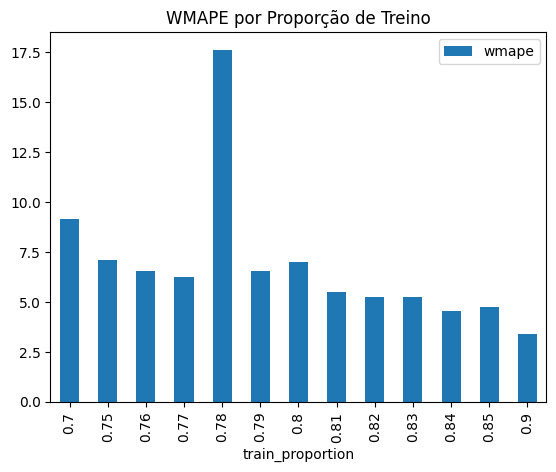

In [ ]:
train_proportion_analysis = df_results.groupby('train_proportion')['wmape'].mean().reset_index()
train_proportion_analysis.plot(x='train_proportion', y='wmape', kind='bar', title='WMAPE por Proporção de Treino')


<Axes: title={'center': 'WMAPE por q'}, xlabel='q'>

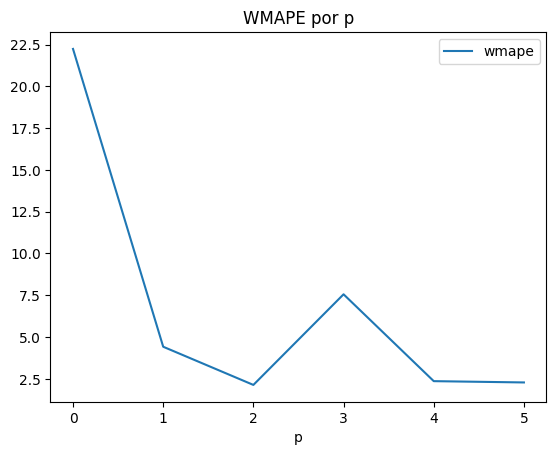

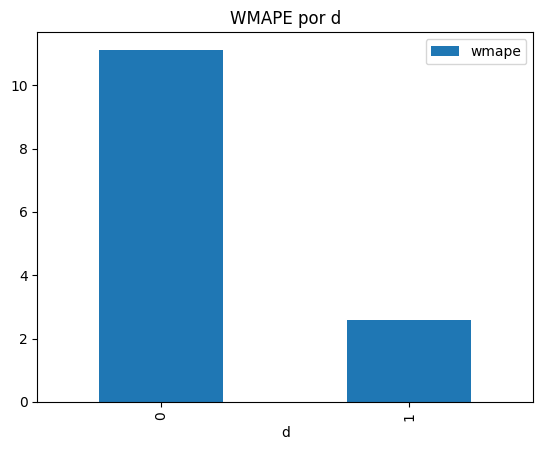

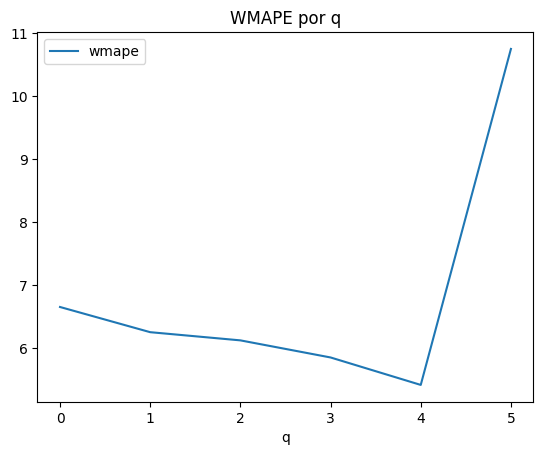

In [ ]:
p_analysis = df_results.groupby('p')['wmape'].mean().reset_index()
p_analysis.plot(x='p', y='wmape', kind='line', title='WMAPE por p')

d_analysis = df_results.groupby('d')['wmape'].mean().reset_index()
d_analysis.plot(x='d', y='wmape', kind='bar', title='WMAPE por d')

q_analysis = df_results.groupby('q')['wmape'].mean().reset_index()
q_analysis.plot(x='q', y='wmape', kind='line', title='WMAPE por q')


In [ ]:
specific_combination = df_results[(df_results['p'] == 2) & (df_results['d'] == 0) & (df_results['q'] == 4)]
print(specific_combination)


     p  d  q  train_proportion     wmape
28   2  0  4              0.70  5.321110
100  2  0  4              0.75  1.037912
170  2  0  4              0.76  0.762877
242  2  0  4              0.77  2.707775
314  2  0  4              0.78  2.353135
386  2  0  4              0.79  3.107862
457  2  0  4              0.80  4.243461
529  2  0  4              0.81  2.349342
601  2  0  4              0.82  2.196822
673  2  0  4              0.83  2.240882
745  2  0  4              0.84  0.737700
816  2  0  4              0.85  1.007249
888  2  0  4              0.90  1.007428


In [ ]:
correlation = df_results[['train_proportion', 'wmape']].corr()
print("Correlação entre proporção de treino e WMAPE:", correlation)


Correlação entre proporção de treino e WMAPE:                   train_proportion     wmape
train_proportion          1.000000 -0.057508
wmape                    -0.057508  1.000000


<Axes: title={'center': 'Melhor Proporção de Treino por WMAPE'}, xlabel='train_proportion'>

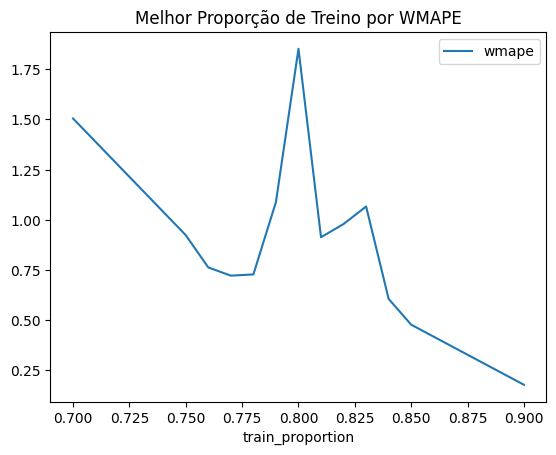

In [ ]:
optimal_proportion = df_results.groupby('train_proportion')['wmape'].min().reset_index()
optimal_proportion.plot(x='train_proportion', y='wmape', kind='line', title='Melhor Proporção de Treino por WMAPE')


<Axes: title={'center': 'Impacto da Proporção de Treino com p fixo'}, xlabel='train_proportion'>

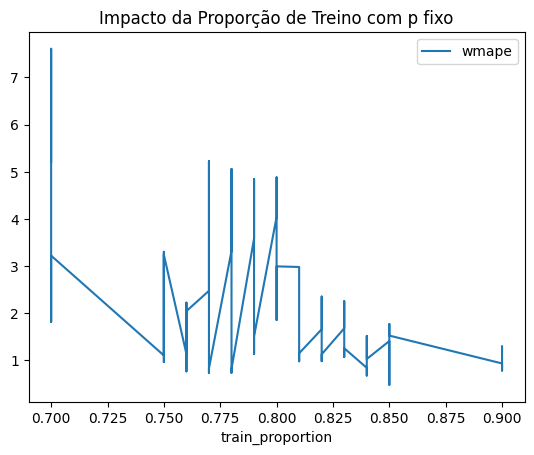

In [ ]:
fixed_p_analysis = df_results[df_results['p'] == 2]
fixed_p_analysis.plot(x='train_proportion', y='wmape', kind='line', title='Impacto da Proporção de Treino com p fixo')


     train_proportion  p  d  q     wmape
871              0.90  0  1  5  0.178179
817              0.85  2  0  5  0.477550
768              0.84  4  0  3  0.605970
237              0.77  1  1  5  0.721933
309              0.78  1  1  5  0.728054
170              0.76  2  0  4  0.762877
572              0.81  5  1  5  0.913408
109              0.75  3  0  2  0.923805
603              0.82  2  1  0  0.979190
678              0.83  2  1  3  1.066547
381              0.79  1  1  5  1.088273
70               0.70  5  1  4  1.505189
461              0.80  2  1  2  1.852339


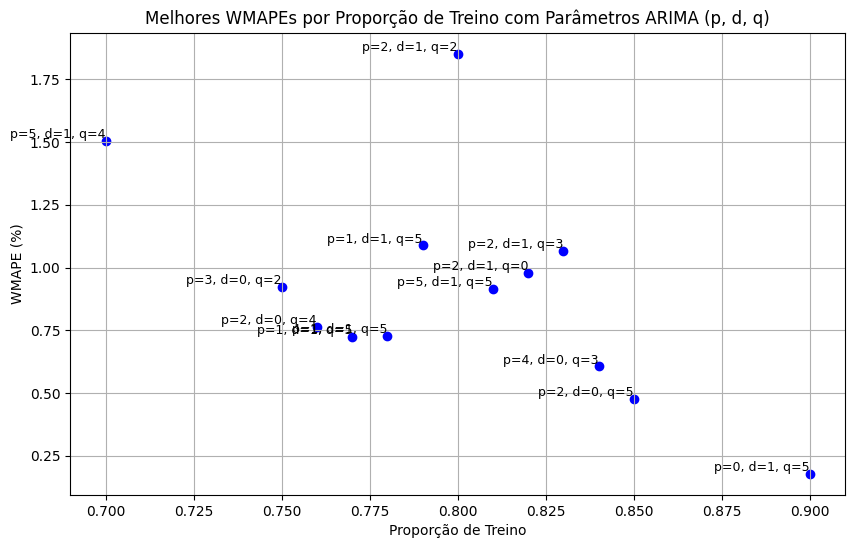

In [ ]:
# Encontrar a linha completa com o menor WMAPE para cada proporção de treino
best_wmape_per_proportion = df_results.loc[df_results.groupby('train_proportion')['wmape'].idxmin()]

# Ordenar a tabela pelo menor WMAPE para o maior
best_wmape_per_proportion_sorted = best_wmape_per_proportion.sort_values(by='wmape')

# Exibir a lista com os melhores WMAPEs, incluindo p, d, q, e em ordem crescente de WMAPE
print(best_wmape_per_proportion_sorted[['train_proportion', 'p', 'd', 'q', 'wmape']])

# Plotar apenas os "bolinhos" marcando os pontos, sem a linha tracejada
plt.figure(figsize=(10,6))
plt.scatter(best_wmape_per_proportion_sorted['train_proportion'], best_wmape_per_proportion_sorted['wmape'], color='blue', label='WMAPE')

# Adicionar rótulos com os valores de p, d, q em cada ponto
for i in range(len(best_wmape_per_proportion_sorted)):
    plt.text(best_wmape_per_proportion_sorted['train_proportion'].iloc[i],
             best_wmape_per_proportion_sorted['wmape'].iloc[i],
             f"p={best_wmape_per_proportion_sorted['p'].iloc[i]}, d={best_wmape_per_proportion_sorted['d'].iloc[i]}, q={best_wmape_per_proportion_sorted['q'].iloc[i]}",
             fontsize=9, verticalalignment='bottom', horizontalalignment='right')

# Configurações do gráfico
plt.title('Melhores WMAPEs por Proporção de Treino com Parâmetros ARIMA (p, d, q)')
plt.xlabel('Proporção de Treino')
plt.ylabel('WMAPE (%)')
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS wil

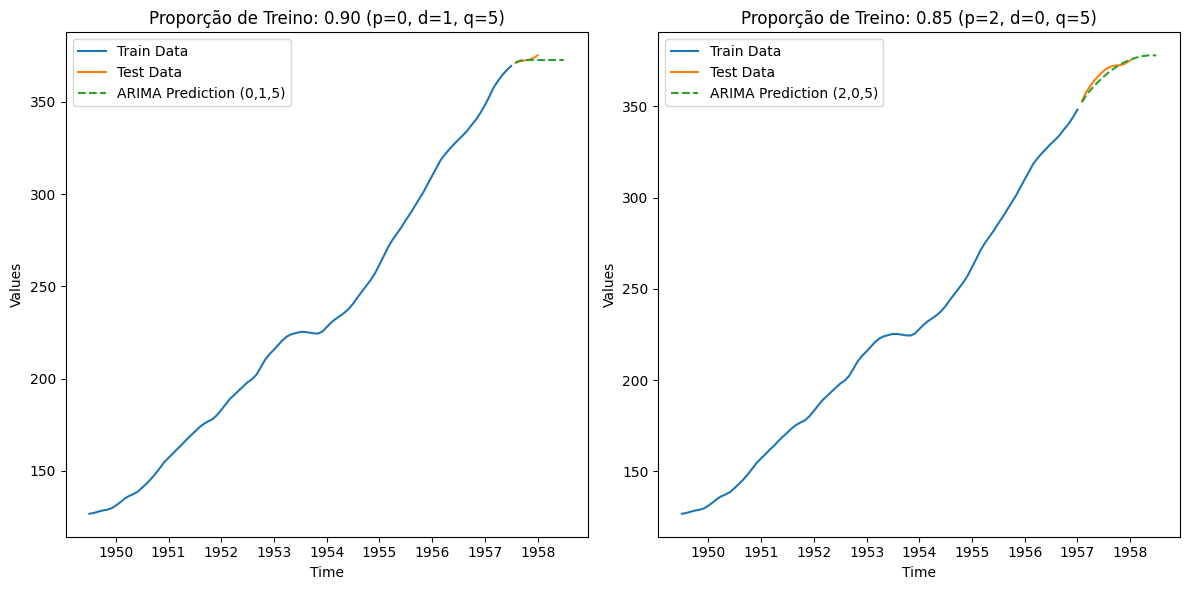

In [ ]:
# Dividir o dataset em treino e teste para cada proporção

# Previsão 1: Para o conjunto de proporção de treino 0.90 com parâmetros (p=0, d=1, q=5)
train_size_1 = int(len(result_sazional.trend) * 0.90)
train_data_1 = result_sazional.trend[:train_size_1]
test_data_1 = result_sazional.trend[train_size_1:]

# Ajustar o modelo ARIMA com p=0, d=1, q=5
model_1 = ARIMA(train_data_1, order=(0, 1, 5))
model_fit_1 = model_1.fit()

# Fazer previsão
predictions_1 = model_fit_1.forecast(steps=len(test_data_1))

# Previsão 2: Para o conjunto de proporção de treino 0.85 com parâmetros (p=2, d=0, q=5)
train_size_2 = int(len(result_sazional.trend) * 0.85)
train_data_2 = result_sazional.trend[:train_size_2]
test_data_2 = result_sazional.trend[train_size_2:]

# Ajustar o modelo ARIMA com p=2, d=0, q=5
model_2 = ARIMA(train_data_2, order=(2, 0, 5))
model_fit_2 = model_2.fit()

# Fazer previsão
predictions_2 = model_fit_2.forecast(steps=len(test_data_2))

# Plotar os resultados para ambos os modelos
plt.figure(figsize=(12, 6))

# Gráfico da Previsão 1 (0.90 de treino, p=0, d=1, q=5)
plt.subplot(1, 2, 1)
plt.plot(train_data_1, label='Train Data')
plt.plot(test_data_1, label='Test Data')
plt.plot(predictions_1, label='ARIMA Prediction (0,1,5)', linestyle='--')
plt.title('Proporção de Treino: 0.90 (p=0, d=1, q=5)')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()

# Gráfico da Previsão 2 (0.85 de treino, p=2, d=0, q=5)
plt.subplot(1, 2, 2)
plt.plot(train_data_2, label='Train Data')
plt.plot(test_data_2, label='Test Data')
plt.plot(predictions_2, label='ARIMA Prediction (2,0,5)', linestyle='--')
plt.title('Proporção de Treino: 0.85 (p=2, d=0, q=5)')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()

plt.tight_layout()
plt.show()

# PARTE 2 - LMP


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# Declarando train e test
train_size_lmp = int(len(data) * 0.78)
train_lmp = data[:train_size_lmp]
test_lmp = data[train_size_lmp:]

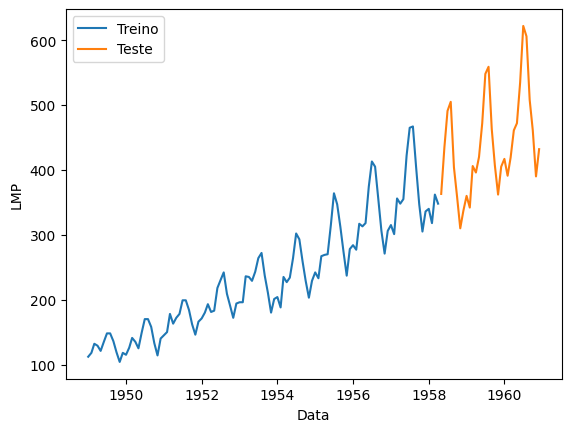

In [ ]:
#plotar teste e train
plt.plot(train_lmp, label='Treino')
plt.plot(test_lmp, label='Teste')
plt.legend(['Treino', 'Teste'])
plt.xlabel('Data')
plt.ylabel('LMP')
plt.show()

In [ ]:
# Normalizando os dados
scaler = MinMaxScaler()
train_lmp_scaled = scaler.fit_transform(train_lmp)
test_lmp_scaled = scaler.transform(test_lmp)

In [ ]:
test_lmp_scaled

In [ ]:
# Criando os dados supervisionados
def create_supervised_data(data, look_back=1):
    X, y = [], []
    for i in range(len(data)-look_back):
        X.append(data[i:i+look_back, 0])
        y.append(data[i+look_back, 0])
    return np.array(X), np.array(y)

In [ ]:
look_back = 12
X_train, y_train = create_supervised_data(train_lmp_scaled, look_back)
X_test, y_test = create_supervised_data(test_lmp_scaled, look_back)

In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(100, 12) (100,)
(20, 12) (20,)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# ### Criar o modelo MLP
# mlp_model = Sequential()
# mlp_model.add(Dense(50, activation='relu', input_dim=look_back))
# mlp_model.add(Dense(50, activation='relu'))
# mlp_model.add(Dense(1))
# mlp_model.compile(loss='mse', optimizer='adam')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
### Criar o modelo MLP
mlp_model = Sequential()
mlp_model.add(Dense(1, input_dim=look_back))
mlp_model.compile(loss='mse', optimizer='adam')
# Treinando com 100 epocas
mlp_model.fit(X_train, y_train, epochs=10, batch_size=16, verbose=1)
# Fazer previsões
mlp_pred_scaled = mlp_model.predict(X_test)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0232  
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0156 
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0105 
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0086 
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0078 
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0079 
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0078 
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0066 
Epoch 9/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0084 
Epoch 10/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0081 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


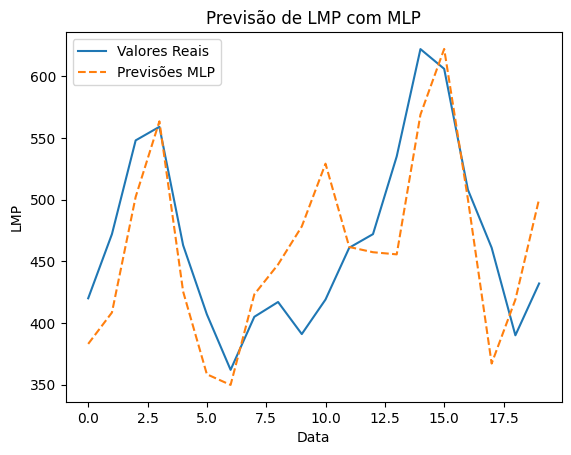

In [ ]:
# Reverter a normalização
mlp_pred = scaler.inverse_transform(mlp_pred_scaled)

# Plotar previsões vs valores reais

plt.plot(test_lmp[12:].values, label='Valores Reais')
plt.plot(mlp_pred, label='Previsões MLP', linestyle='--')
plt.title('Previsão de LMP com MLP')
plt.xlabel('Data')
plt.ylabel('LMP')
plt.legend()
plt.show()

In [ ]:
list(zip(mlp_pred, test_lmp[12:].values))

[(array([655.8691], dtype=float32), array([420])),
 (array([678.8965], dtype=float32), array([472])),
 (array([660.673], dtype=float32), array([548])),
 (array([612.4232], dtype=float32), array([559])),
 (array([527.0234], dtype=float32), array([463])),
 (array([495.16138], dtype=float32), array([407])),
 (array([371.63763], dtype=float32), array([362])),
 (array([417.04053], dtype=float32), array([405])),
 (array([487.47665], dtype=float32), array([417])),
 (array([561.1414], dtype=float32), array([391])),
 (array([570.425], dtype=float32), array([419])),
 (array([554.4687], dtype=float32), array([461])),
 (array([710.26355], dtype=float32), array([472])),
 (array([784.26636], dtype=float32), array([535])),
 (array([766.69684], dtype=float32), array([622])),
 (array([683.3828], dtype=float32), array([606])),
 (array([623.75806], dtype=float32), array([508])),
 (array([555.41925], dtype=float32), array([461])),
 (array([482.07272], dtype=float32), array([390])),
 (array([488.88168], dt

# Refazendo parte 2